In [ ]:
import pandas as pd

In [ ]:
file_path = ("/content/drive/MyDrive/fintech_transactions.csv")
df = pd.read_csv(file_path)

In [ ]:
print("Shape of Dataset:", df.shape) #rows & Columns
print("\nFirst 5 Rows:\n")
df.head()#Preview

Shape of Dataset: (500, 8)

First 5 Rows:



,transaction_id,customer_id,transaction_date,transaction_type,amount,merchant,channel,balance_after_transaction
0,TXN00001,CUST039,2024-01-01,Withdrawal,10495,Netflix,USSD,0.0
1,TXN00002,CUST029,2024-01-02,Withdrawal,16341,Jumia,POS,0.0
2,TXN00003,CUST015,2024-01-03,Deposit,38456,Airtime Topup,ATM,38456.0
3,TXN00004,CUST043,2024-01-04,Withdrawal,27796,Shell,ATM,0.0
4,TXN00005,CUST008,2024-01-05,Withdrawal,5044,Uber,Mobile App,0.0


In [ ]:
print("Dataset info\n")
print(df.info())

Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             500 non-null    object 
 1   customer_id                500 non-null    object 
 2   transaction_date           500 non-null    object 
 3   transaction_type           500 non-null    object 
 4   amount                     500 non-null    int64  
 5   merchant                   500 non-null    object 
 6   channel                    500 non-null    object 
 7   balance_after_transaction  500 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ KB
None


df.info()

In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
transaction_id,0
customer_id,0
transaction_date,0
transaction_type,0
amount,0
merchant,0
channel,0
balance_after_transaction,0


In [ ]:
#How many unique customers?
print("\nUnique Customers:")
df['customer_id'].nunique()


Unique Customers:


50

In [ ]:
#What are the transaction types and how many?
print("\nTransaction types:")
df['transaction_type'].value_counts()


Transaction types:


,count
transaction_type,
Withdrawal,157
Deposit,146
Payment,107
Transfer,90


In [ ]:
#Which channel do customer use most?
print("\nChannel:")
df['channel'].value_counts()


Channel:


,count
channel,
POS,136
USSD,128
Mobile App,128
ATM,108


In [ ]:
#Which merchants get the most transaction
print("\nTop 5 Merchants:")
df['merchant'].value_counts().head(5)


Top 5 Merchants:


,count
merchant,
Uber,58
Apple Store,53
Amazon,52
Airtime Topup,52
Spotify,52


In [ ]:
#Total transaction volumne and value
print("\nTotal Transaction:",df['transaction_id'].nunique())

print("\nTotal Amount: ₦",df['amount'].sum())



Total Transaction: 500

Total Amount: ₦ 12543300


In [ ]:
#Average transaction amount by type
print("\nAverage transactions by transaction type")
df.groupby('transaction_type')['amount'].mean()


Average transactions by transaction type


,amount
transaction_type,
Deposit,25786.027397
Payment,24354.308411
Transfer,25718.088889
Withdrawal,24573.254777


In [ ]:
#Trends of transactions over time
transaction_per_day = df.groupby('transaction_date').size()
print("\nTransactions per day:", )
transaction_per_day.head(10)


Transactions per day:


,0
transaction_date,
2024-01-01,1
2024-01-02,1
2024-01-03,1
2024-01-04,1
2024-01-05,1
2024-01-06,1
2024-01-07,1
2024-01-08,1
2024-01-09,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-3816079808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'transaction_type', order = df['transaction_type'].value_counts().index, palette = "Set2" )


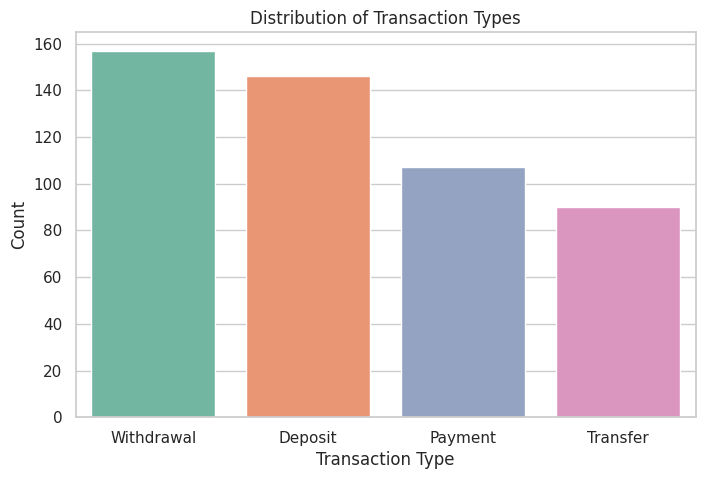

In [ ]:
#Transaction Type Distribution
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'transaction_type', order = df['transaction_type'].value_counts().index, palette = "Set2" )
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3331945873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'channel', order = df['channel'].value_counts().index, palette ="coolwarm")


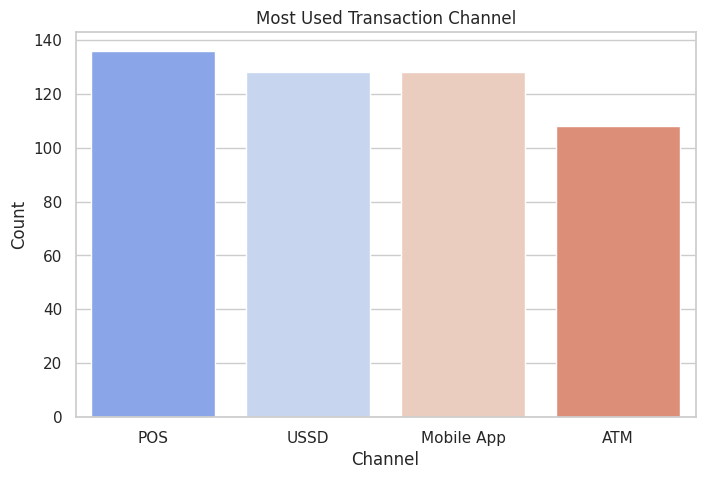

In [ ]:
#Channel Usage
plt.figure(figsize = (8,5))
sns.countplot(data =df, x = 'channel', order = df['channel'].value_counts().index, palette ="coolwarm")
plt.title('Most Used Transaction Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1428934015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_merchants.index, y = top_merchants.values, palette = "viridis")


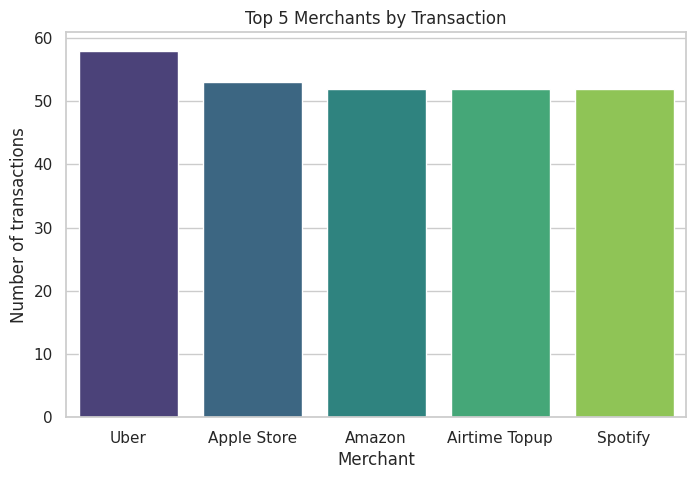

In [ ]:
#Top 5 Merchant
top_merchants = df['merchant'].value_counts().head(5)
plt.figure(figsize = (8,5))
sns.barplot(x = top_merchants.index, y = top_merchants.values, palette = "viridis")
plt.title('Top 5 Merchants by Transaction')
plt.xlabel('Merchant')
plt.ylabel('Number of transactions')
plt.show()

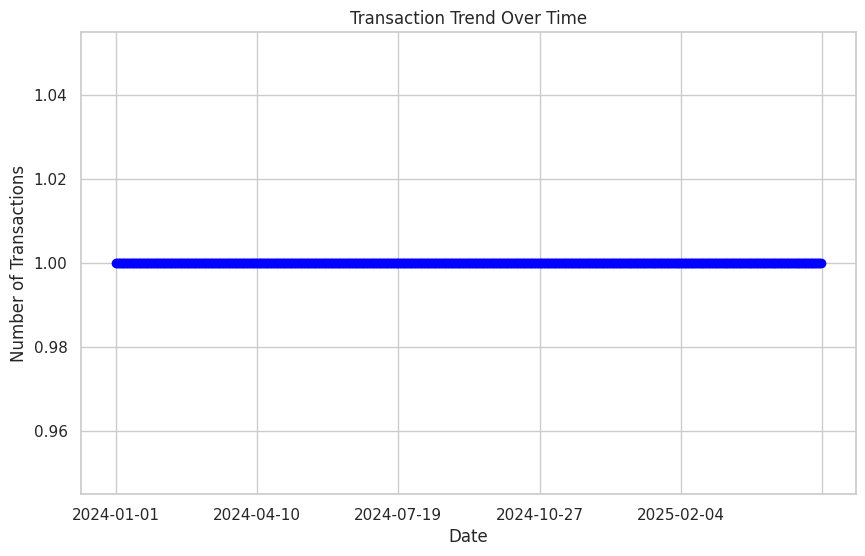

In [ ]:
#Transaction Trend Over Time
transaction_per_day = df.groupby('transaction_date').size()
plt.figure(figsize = (10,6))
transaction_per_day.plot(kind='line', marker='o', linewidth=1, color='blue')

plt.title('Transaction Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()